**Question 1**

Given a string `s`, *find the first non-repeating character in it and return its index*. If it does not exist, return `-1`.

**Example 1:**
Input: s = "leetcode"
Output: 0

Input: s = "loveleetcode"
Output: 2


Input: s = "aabb"
Output: -1

In [22]:
def first_nonrepeating_char(s):
    if len(s) == 0:
        return -1
    
    else:
        idx = -1
        for i in range(len(s)):
            if s.count(s[i]) == 1:
                return f"First non-repeating character is {i}"
            else:
                idx += 1

        if idx == len(s)-1:
            print("All character are non-repeating")
         
# Drivercode

string = "loveleetcode"
first_nonrepeating_char(string)

'First non-repeating character is 2'

**Question 2**

Given a **circular integer array** `nums` of length `n`, return *the maximum possible sum of a non-empty **subarray** of* `nums`.

A **circular array** means the end of the array connects to the beginning of the array. Formally, the next element of `nums[i]` is `nums[(i + 1) % n]` and the previous element of `nums[i]` is `nums[(i - 1 + n) % n]`.

A **subarray** may only include each element of the fixed buffer `nums` at most once. Formally, for a subarray `nums[i], nums[i + 1], ..., nums[j]`, there does not exist `i <= k1`, `k2 <= j` with `k1 % n == k2 % n`.

**Example 1:**

Input: nums = [1,-2,3,-2]
Output: 3
Explanation: Subarray [3] has maximum sum 3.

Input: nums = [5,-3,5]
Output: 10
Explanation: Subarray [5,5] has maximum sum 5 + 5 = 10.


Input: nums = [-3,-2,-3]
Output: -2
Explanation: Subarray [-2] has maximum sum -2.

In [23]:
def maxCircularSum(a, n):
    if (n == 1):
        return a[0]
    
    sum = 0
    for i in range(n):
        sum += a[i]
 
    # Initialize every variable with first value of array.
    curr_max = a[0]
    max_so_far = a[0]
    curr_min = a[0]
    min_so_far = a[0]
 
    # Concept of Kadane's Algorithm
    for i in range(1, n):
       
        # Kadane's Algorithm to find Maximum subarray sum.
        curr_max = max(curr_max + a[i], a[i])
        max_so_far = max(max_so_far, curr_max)
 
        # Kadane's Algorithm to find Minimum subarray sum.
        curr_min = min(curr_min + a[i], a[i])
        min_so_far = min(min_so_far, curr_min)

    if (min_so_far == sum):
        return max_so_far
 
    # returning the maximum value
    return max(max_so_far, sum - min_so_far)
 
# Driver code
a = [-3,-2,-3]
n = len(a)
print("Maximum circular sum is", maxCircularSum(a, n))

Maximum circular sum is -2


**Question 3**

The school cafeteria offers circular and square sandwiches at lunch break, referred to by numbers `0` and `1` respectively. All students stand in a queue. Each student either prefers square or circular sandwiches.

The number of sandwiches in the cafeteria is equal to the number of students. The sandwiches are placed in a **stack**. At each step:

- If the student at the front of the queue **prefers** the sandwich on the top of the stack, they will **take it** and leave the queue.
- Otherwise, they will **leave it** and go to the queue's end.

This continues until none of the queue students want to take the top sandwich and are thus unable to eat.

You are given two integer arrays `students` and `sandwiches` where `sandwiches[i]` is the type of the `ith` sandwich in the stack (`i = 0` is the top of the stack) and `students[j]` is the preference of the `jth` student in the initial queue (`j = 0` is the front of the queue). Return *the number of students that are unable to eat.*

**Example 1:**

Input: students = [1,1,0,0], sandwiches = [0,1,0,1]
Output: 0
Explanation:
- Front student leaves the top sandwich and returns to the end of the line making students = [1,0,0,1].
- Front student leaves the top sandwich and returns to the end of the line making students = [0,0,1,1].
- Front student takes the top sandwich and leaves the line making students = [0,1,1] and sandwiches = [1,0,1].
- Front student leaves the top sandwich and returns to the end of the line making students = [1,1,0].
- Front student takes the top sandwich and leaves the line making students = [1,0] and sandwiches = [0,1].
- Front student leaves the top sandwich and returns to the end of the line making students = [0,1].
- Front student takes the top sandwich and leaves the line making students = [1] and sandwiches = [1].
- Front student takes the top sandwich and leaves the line making students = [] and sandwiches = [].
Hence all students are able to eat.

Input: students = [1,1,1,0,0,1], sandwiches = [1,0,0,0,1,1]
Output: 3


In [24]:
from collections import Counter

def countStudents(students, sandwiches):
    # create a counter of students.
    student_count = Counter(students)
    # print(student_count)

    # iterate sandwiches, one by one and 
    # check if there is any student left who wants that sandwich.
    for sandwich in sandwiches:

        if student_count[sandwich] > 0:
            # student who wants that sandwich, we decrease counter by 1
            student_count[sandwich] -= 1

        else:
            return student_count[not sandwich]
    return 0

# Driver code 

students = [1,1,1,0,0,1]
sandwiches = [1,0,0,0,1,1]

countStudents(students, sandwiches)

3

**Question 4**
You have a `RecentCounter` class which counts the number of recent requests within a certain time frame.

Implement the `RecentCounter` class:

- `RecentCounter()` Initializes the counter with zero recent requests.
- `int ping(int t)` Adds a new request at time `t`, where `t` represents some time in milliseconds, and returns the number of requests that has happened in the past `3000` milliseconds (including the new request). Specifically, return the number of requests that have happened in the inclusive range `[t - 3000, t]`.

It is **guaranteed** that every call to `ping` uses a strictly larger value of `t` than the previous call.

**Example 1:**
Input
["RecentCounter", "ping", "ping", "ping", "ping"]
[[], [1], [100], [3001], [3002]]
Output
[null, 1, 2, 3, 3]

Explanation
RecentCounter recentCounter = new RecentCounter();
recentCounter.ping(1);     // requests = [1], range is [-2999,1], return 1
recentCounter.ping(100);   // requests = [1,100], range is [-2900,100], return 2
recentCounter.ping(3001);  // requests = [1,100,3001], range is [1,3001], return 3
recentCounter.ping(3002);  // requests = [1,100,3001,3002], range is [2,3002], return 3

**Algorithm:**

To implement the sliding window, we could use the LinkedList in Java or deque in Python.

Then the ping(t) function can be implemented in two steps:

Step 1): we append the current ping call to the tail of the sliding window.

Step 2): starting from the head of the sliding window, we remove the outdated calls, until we come across a still valid ping call.

As a result, the remaining calls in the sliding window are the ones that fall into the range of [t - 3000, t].

In [25]:
from collections import deque

class RecentCounter:

    def __init__(self):
        self.slide_window = deque()

    def ping(self, t: int) -> int:
        # step 1). append the current call
        self.slide_window.append(t)

        # step 2). invalidate the outdated pings
        while self.slide_window[0] < t - 3000:
            self.slide_window.popleft()

        return len(self.slide_window)

# tc = O(1)
# sc = O(1)

**Question 5**

There are `n` friends that are playing a game. The friends are sitting in a circle and are numbered from `1` to `n` in **clockwise order**. More formally, moving clockwise from the `ith` friend brings you to the `(i+1)th` friend for `1 <= i < n`, and moving clockwise from the `nth` friend brings you to the `1st` friend.

The rules of the game are as follows:

1. **Start** at the `1st` friend.
2. Count the next `k` friends in the clockwise direction **including** the friend you started at. The counting wraps around the circle and may count some friends more than once.
3. The last friend you counted leaves the circle and loses the game.
4. If there is still more than one friend in the circle, go back to step `2` **starting** from the friend **immediately clockwise** of the friend who just lost and repeat.
5. Else, the last friend in the circle wins the game.

Given the number of friends, `n`, and an integer `k`, return *the winner of the game*.

**Example 1:**

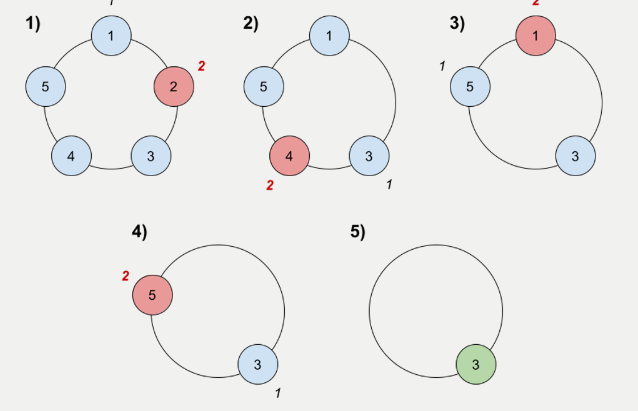

Input: n = 5, k = 2
Output: 3
Explanation: Here are the steps of the game:
1) Start at friend 1.
2) Count 2 friends clockwise, which are friends 1 and 2.
3) Friend 2 leaves the circle. Next start is friend 3.
4) Count 2 friends clockwise, which are friends 3 and 4.
5) Friend 4 leaves the circle. Next start is friend 5.
6) Count 2 friends clockwise, which are friends 5 and 1.
7) Friend 1 leaves the circle. Next start is friend 3.
8) Count 2 friends clockwise, which are friends 3 and 5.
9) Friend 5 leaves the circle. Only friend 3 is left, so they are the winner.


Input: n = 6, k = 5
Output: 1
Explanation: The friends leave in this order: 5, 4, 6, 2, 3. The winner is friend 1.


In [26]:
def helper( n:int, k:int)-> int:
    if(n==1):
        return 0
    prevWinner = helper(n-1, k)
    return (prevWinner + k) % n

def findTheWinner(n: int, k: int) -> int:
        return helper(n,k)+1


# Drivercode

n = 6
k = 5

findTheWinner(n,k)


1

**Question 6**

You are given an integer array `deck`. There is a deck of cards where every card has a unique integer. The integer on the `ith` card is `deck[i]`.

You can order the deck in any order you want. Initially, all the cards start face down (unrevealed) in one deck.

You will do the following steps repeatedly until all cards are revealed:

1. Take the top card of the deck, reveal it, and take it out of the deck.
2. If there are still cards in the deck then put the next top card of the deck at the bottom of the deck.
3. If there are still unrevealed cards, go back to step 1. Otherwise, stop.

Return *an ordering of the deck that would reveal the cards in increasing order*.

**Note** that the first entry in the answer is considered to be the top of the deck.

**Example 1:**

Input: deck = [17,13,11,2,3,5,7]
Output: [2,13,3,11,5,17,7]
Explanation:
We get the deck in the order [17,13,11,2,3,5,7] (this order does not matter), and reorder it.
After reordering, the deck starts as [2,13,3,11,5,17,7], where 2 is the top of the deck.
We reveal 2, and move 13 to the bottom.  The deck is now [3,11,5,17,7,13].
We reveal 3, and move 11 to the bottom.  The deck is now [5,17,7,13,11].
We reveal 5, and move 17 to the bottom.  The deck is now [7,13,11,17].
We reveal 7, and move 13 to the bottom.  The deck is now [11,17,13].
We reveal 11, and move 17 to the bottom.  The deck is now [13,17].
We reveal 13, and move 17 to the bottom.  The deck is now [17].
We reveal 17.
Since all the cards revealed are in increasing order, the answer is correct.

Input: deck = [1,1000]
Output: [1,1000]


In [27]:
import collections

def deckRevealedIncreasing(deck):
    N = len(deck)
    index = collections.deque(range(N))
    ans = [None] * N

    for card in sorted(deck):
        ans[index.popleft()] = card
        if index:
            index.append(index.popleft())

    return ans

# Driver code 

deck = [17,13,11,2,3,5,7]
deckRevealedIncreasing(deck)

# tc =O(nlog n)
# sc = O(n)

[2, 13, 3, 11, 5, 17, 7]

 **Question 7**

Design a queue that supports `push` and `pop` operations in the front, middle, and back.

Implement the `FrontMiddleBack` class:

- `FrontMiddleBack()` Initializes the queue.
- `void pushFront(int val)` Adds `val` to the **front** of the queue.
- `void pushMiddle(int val)` Adds `val` to the **middle** of the queue.
- `void pushBack(int val)` Adds `val` to the **back** of the queue.
- `int popFront()` Removes the **front** element of the queue and returns it. If the queue is empty, return `1`.
- `int popMiddle()` Removes the **middle** element of the queue and returns it. If the queue is empty, return `1`.
- `int popBack()` Removes the **back** element of the queue and returns it. If the queue is empty, return `1`.

**Notice** that when there are **two** middle position choices, the operation is performed on the **frontmost** middle position choice. For example:

- Pushing `6` into the middle of `[1, 2, 3, 4, 5]` results in `[1, 2, 6, 3, 4, 5]`.
- Popping the middle from `[1, 2, 3, 4, 5, 6]` returns `3` and results in `[1, 2, 4, 5, 6]`.

**Example 1:**


Input:
["FrontMiddleBackQueue", "pushFront", "pushBack", "pushMiddle", "pushMiddle", "popFront", "popMiddle", "popMiddle", "popBack", "popFront"]
[[], [1], [2], [3], [4], [], [], [], [], []]
Output:
[null, null, null, null, null, 1, 3, 4, 2, -1]

Explanation:
FrontMiddleBackQueue q = new FrontMiddleBackQueue();
q.pushFront(1);   // [1]
q.pushBack(2);    // [1,2]
q.pushMiddle(3);  // [1,3, 2]
q.pushMiddle(4);  // [1,4, 3, 2]
q.popFront();     // return 1 -> [4, 3, 2]
q.popMiddle();    // return 3 -> [4, 2]
q.popMiddle();    // return 4 -> [2]
q.popBack();      // return 2 -> []
q.popFront();     // return -1 -> [] (The queue is empty)

In [28]:
class FrontMiddleBackQueue:

    def __init__(self):
        self.l = []

    def pushFront(self, val: int) -> None:
        self.l.insert(0,val)
        

    def pushMiddle(self, val: int) -> None:
        a = len(self.l)//2
        self.l.insert(a,val)

    def pushBack(self, val: int) -> None:
        self.l.append(val)
        

    def popFront(self) -> int:
        if len(self.l)>0:
            return self.l.pop(0)
        return -1

        

    def popMiddle(self) -> int:
        if len(self.l)>0 and len(self.l)%2!=0: 
            a = (len(self.l)//2) 
            return self.l.pop(a)
        elif len(self.l)> 0 and len(self.l)%2==0: 
            a = (len(self.l)//2)-1
            return self.l.pop(a)

        return -1
        

    def popBack(self) -> int:
        if len(self.l)>0 :
            return self.l.pop()
        return -1

# Driver code    

obj = FrontMiddleBackQueue()
obj.pushFront(1)
print(obj.l)
obj.pushBack(2)
print(obj.l)
obj.pushMiddle(3)
print(obj.l)
obj.pushMiddle(4)
print(obj.l)
print("********")
param_4 = obj.popFront()
param_5 = obj.popMiddle()
param_6 = obj.popMiddle()
param_7 = obj.popBack()
param_8 = obj.popFront()

print(param_4)
print(param_5)
print(param_6)
print(param_7)
print(param_8)
print(obj.l)

[1]
[1, 2]
[1, 3, 2]
[1, 4, 3, 2]
********
1
3
4
2
-1
[]


**Question 8**

For a stream of integers, implement a data structure that checks if the last `k` integers parsed in the stream are **equal** to `value`.

Implement the **DataStream** class:

- `DataStream(int value, int k)` Initializes the object with an empty integer stream and the two integers `value` and `k`.
- `boolean consec(int num)` Adds `num` to the stream of integers. Returns `true` if the last `k` integers are equal to `value`, and `false` otherwise. If there are less than `k` integers, the condition does not hold true, so returns `false`.

**Example 1:**

Input
["DataStream", "consec", "consec", "consec", "consec"]
[[4, 3], [4], [4], [4], [3]]
Output
[null, false, false, true, false]

Explanation
DataStream dataStream = new DataStream(4, 3); //value = 4, k = 3
dataStream.consec(4); // Only 1 integer is parsed, so returns False.
dataStream.consec(4); // Only 2 integers are parsed.
                      // Since 2 is less than k, returns False.
dataStream.consec(4); // The 3 integers parsed are all equal to value, so returns True.
dataStream.consec(3); // The last k integers parsed in the stream are [4,4,3].
                      // Since 3 is not equal to value, it returns False.

In [29]:
class DataStream:

    def __init__(self, value: int, k: int):
        self.count = 0 
        self.value = value
        self.k = k

    def consec(self, num: int) -> bool:
        if num == self.value:
            self.count += 1
        else: 
            self.count = 0 
            
        return self.count >= self.k
    
value = 4
k = 3
num = 4
obj = DataStream(value, k)
param_1 = obj.consec(num)

print(param_1)

False


In [30]:
obj.consec(num)

False

In [31]:
obj.consec(num)

True

In [32]:
num = 3
obj.consec(num)

False